In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

Загрузим данные, оценим основную информацию о датасете:

In [48]:
data_train = pd.read_csv('/content/drive/MyDrive/train.csv')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


Оценим количество пропусков:

In [49]:
data_train.isna().sum()

,0
id,0
gravity,0
ph,0
osmo,0
cond,0
urea,0
calc,0
target,0


Пропусков нет. Построим гистограммы, чтоб оценить данные на предмет наличия аномалий:

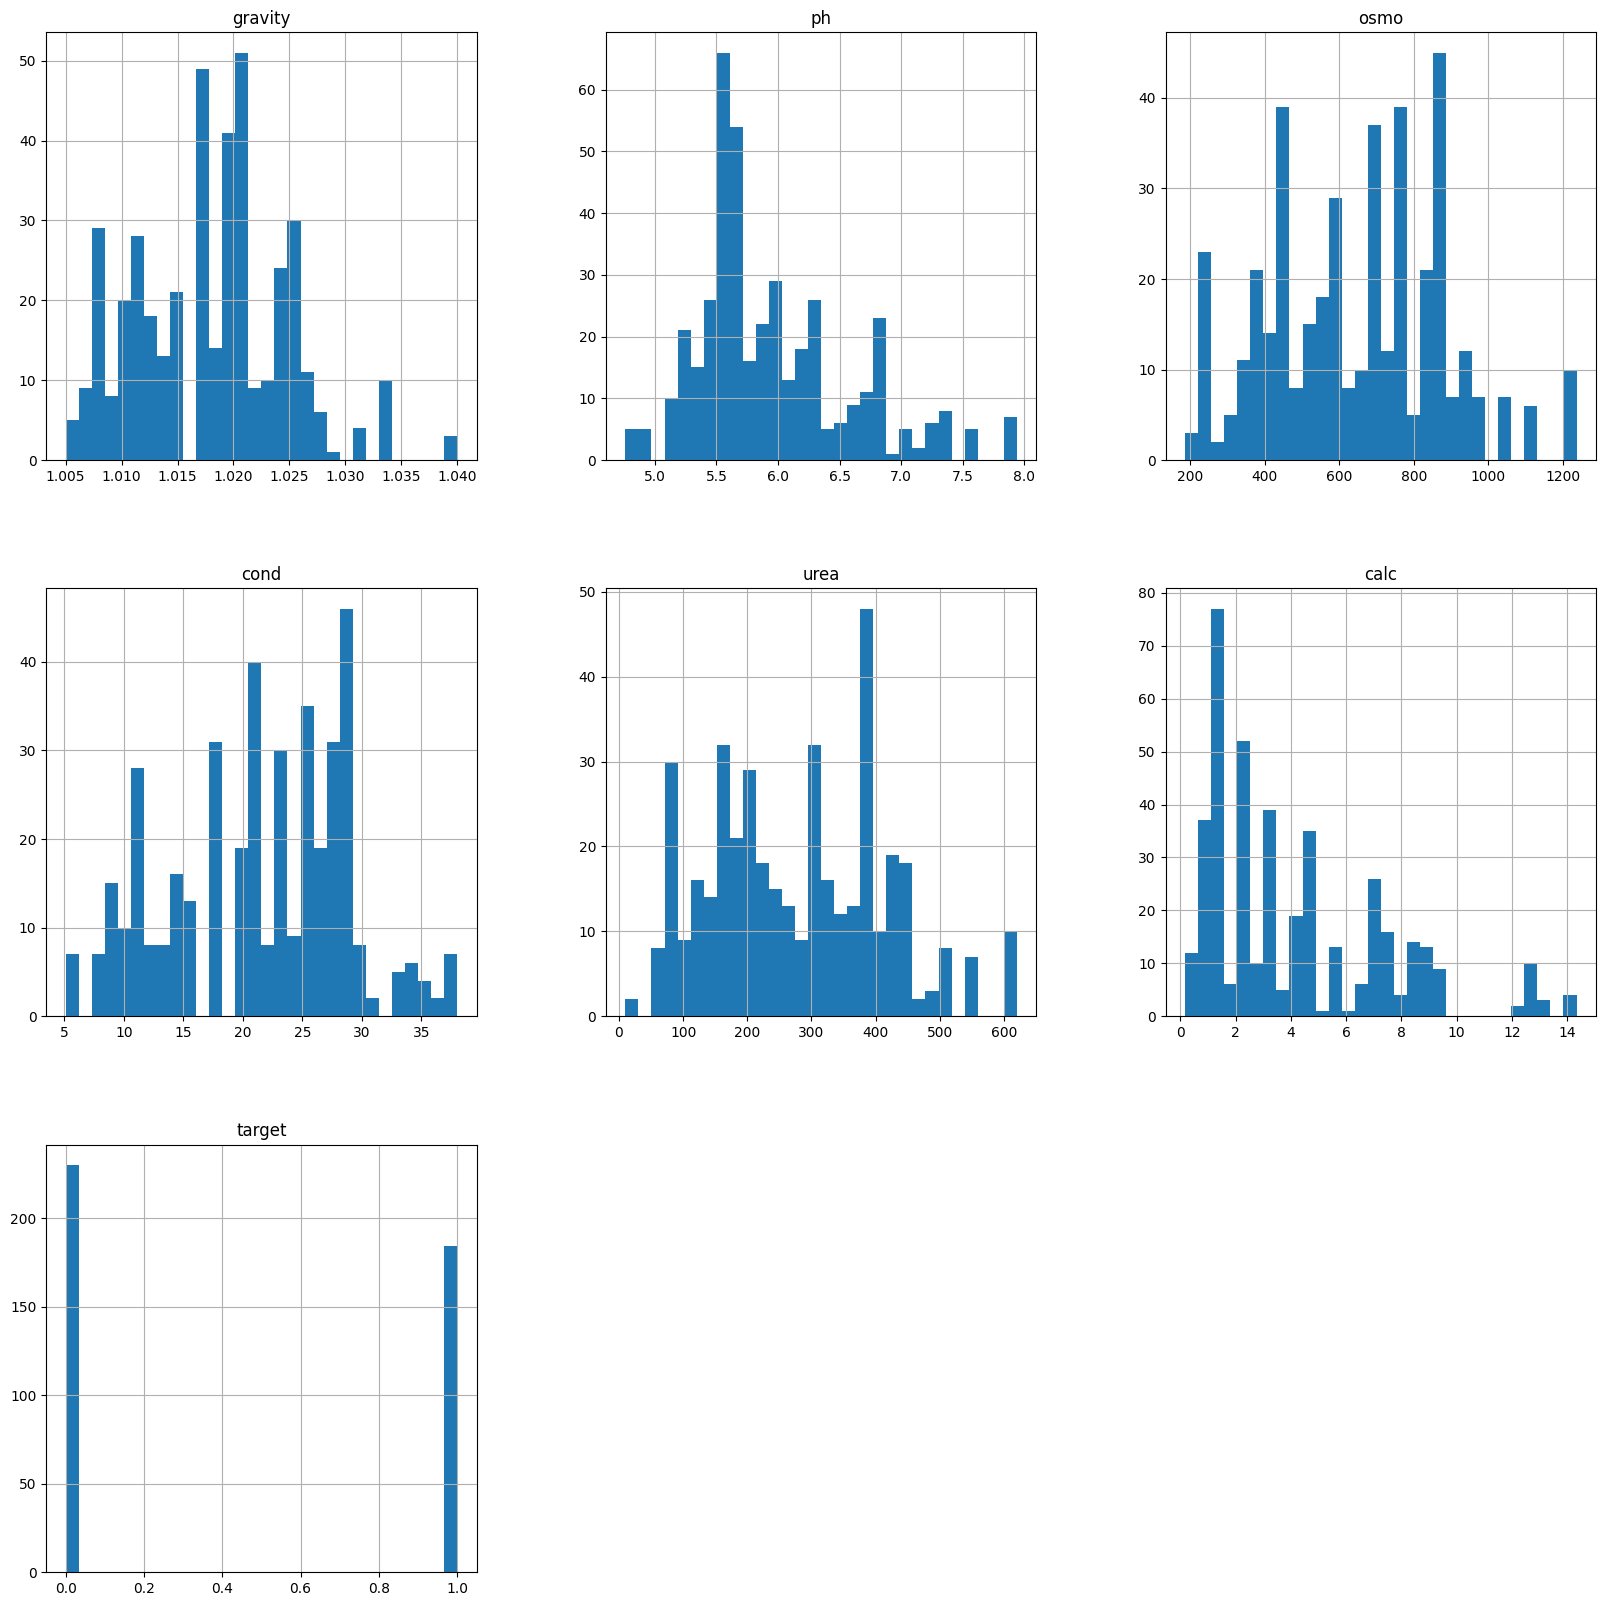

In [50]:
data_train.drop(columns='id').hist( figsize=(20,20), bins=30); #построение гистограммы

Аномальные выбросы не наблюдаются на графиках. Дисбаланс классов незначительный. оценим основные стат. характеристики данных:

In [51]:
data_train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [52]:
data_train.head(20)

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
5,5,1.025,6.90,947,28.4,395,2.64,1
6,6,1.008,5.09,371,15.5,159,2.17,1
7,7,1.015,5.53,450,8.1,170,1.16,0
8,8,1.025,7.38,736,25.3,418,1.52,0
9,9,1.017,6.61,527,20.0,75,4.49,1


Данные, карактеризуются разномасштабностью, необходимо будет произвести нормирование данных.

Разобьем данные на две выборки: обучающая 80% данных, тестовая 20% данных:

In [53]:
data_train, data_test = train_test_split(data_train, test_size=0.2, random_state=12345) # отделяем обучающую выборку от остатка

Проверим результат разбивки данных, оцинив объем полученных выборок:

In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 341 to 285
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       331 non-null    int64  
 1   gravity  331 non-null    float64
 2   ph       331 non-null    float64
 3   osmo     331 non-null    int64  
 4   cond     331 non-null    float64
 5   urea     331 non-null    int64  
 6   calc     331 non-null    float64
 7   target   331 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 23.3 KB


In [55]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, 160 to 99
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       83 non-null     int64  
 1   gravity  83 non-null     float64
 2   ph       83 non-null     float64
 3   osmo     83 non-null     int64  
 4   cond     83 non-null     float64
 5   urea     83 non-null     int64  
 6   calc     83 non-null     float64
 7   target   83 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


Данные успешно разбиты на выборки, сформируем значения параметров и значения целевой функции по каждой из частей данных:

In [56]:
features_train = data_train.drop('target', axis=1)
target_train = data_train['target']
features_test = data_test.drop('target', axis=1)
target_test = data_test['target']

Нормализуем данные:

In [57]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Определим параметры поиска гиперпараметров и кросс-валидации:

In [85]:
param_grid = {'n_neighbors': range(1, 30),
              'p': [1, 2]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2]},
             scoring='roc_auc')

In [86]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001543,0.000503,0.003106,0.000317,1,1,"{'n_neighbors': 1, 'p': 1}",0.617967,0.467381,0.655638,0.630941,0.692451,0.612876,0.077048,58
1,0.001249,0.000025,0.002592,0.000036,1,2,"{'n_neighbors': 1, 'p': 2}",0.613884,0.559646,0.676608,0.665424,0.640727,0.631258,0.041818,57
2,0.001224,0.000019,0.002723,0.000092,2,1,"{'n_neighbors': 2, 'p': 1}",0.677405,0.671948,0.778192,0.667288,0.688723,0.696711,0.041363,53
3,0.001437,0.000401,0.003001,0.000516,2,2,"{'n_neighbors': 2, 'p': 2}",0.614791,0.676608,0.718080,0.685461,0.734856,0.685959,0.041413,56
4,0.001283,0.000046,0.002875,0.000172,3,1,"{'n_neighbors': 3, 'p': 1}",0.682849,0.667288,0.737651,0.682665,0.712954,0.696682,0.025279,54
5,0.001301,0.000078,0.002748,0.000190,3,2,"{'n_neighbors': 3, 'p': 2}",0.656987,0.701305,0.698509,0.662628,0.741379,0.692162,0.030515,55
6,0.001215,0.000008,0.002743,0.000041,4,1,"{'n_neighbors': 4, 'p': 1}",0.723684,0.687325,0.760019,0.678006,0.734390,0.716685,0.030326,51
7,0.001333,0.000247,0.002724,0.000148,4,2,"{'n_neighbors': 4, 'p': 2}",0.703267,0.725536,0.746971,0.678472,0.726934,0.716236,0.023409,52
8,0.001310,0.000138,0.002955,0.000298,5,1,"{'n_neighbors': 5, 'p': 1}",0.722777,0.701305,0.776328,0.679870,0.740447,0.724145,0.033084,49
9,0.001226,0.000013,0.002751,0.000088,5,2,"{'n_neighbors': 5, 'p': 2}",0.716425,0.731594,0.759553,0.695713,0.736719,0.728001,0.021265,47


Оптимальные гиперпараметры найденные перебором в ГридСеарч

In [87]:
grid_search.best_params_

{'n_neighbors': 26, 'p': 1}

In [88]:
knn_best = KNeighborsClassifier(**grid_search.best_params_)

Обучим модель с оптимальными гиперпараметрами на обучающей выборке:

In [89]:
knn_best.fit(features_train, target_train)

KNeighborsClassifier(n_neighbors=26, p=1)

Построим предсказания для обучающей и тестовой выборки, с помощью обученной модели:

In [90]:
test_pred = knn_best.predict(features_test)
train_pred = knn_best.predict(features_train)

Рассчитаем матрицы ошибок:

In [91]:
# Матрица ошибок
conf_matrix = confusion_matrix(target_test, test_pred)
print("Confusion Matrix Test:")
print(conf_matrix)

conf_matrix = confusion_matrix(target_train, train_pred)
print("Confusion Matrix Train:")
print(conf_matrix)


Confusion Matrix Test:
[[36  8]
 [13 26]]
Confusion Matrix Train:
[[158  28]
 [ 61  84]]


Рассчитаем основные метрики оценки качества моделей классификации:

In [93]:

# Accuracy

print("Accuracy на тестовой выборке:", accuracy_score(target_test, test_pred), "Accuracy на тренеровочной выборке:", accuracy_score(target_train, train_pred))

# Precision
print("Precision на тестовой выборке:", precision_score(target_test, test_pred), "Precision на тренеровочной выборке:", precision_score(target_train, train_pred))

# Recall
print("Recall на тестовой выборке:", recall_score(target_test, test_pred), "Recall на тренеровочной выборке:", recall_score(target_train, train_pred))

print("AUC ROC на тестовой выборке:", roc_auc_score(target_test, test_pred), "AUC ROC на тренеровочной выборке:", roc_auc_score(target_train, train_pred))

Accuracy на тестовой выборке: 0.7469879518072289 Accuracy на тренеровочной выборке: 0.7311178247734139
Precision на тестовой выборке: 0.7647058823529411 Precision на тренеровочной выборке: 0.75
Recall на тестовой выборке: 0.6666666666666666 Recall на тренеровочной выборке: 0.5793103448275863
AUC ROC на тестовой выборке: 0.7424242424242422 AUC ROC на тренеровочной выборке: 0.714386355209492


Близость значений метрик на обучающей и тестовой выборке говорит об отсутствии эффекта переобучения

In [96]:

test_prob = knn_best.predict_proba(features_test)[:, 1]


train_prob = knn_best.predict_proba(features_train)[:, 1]

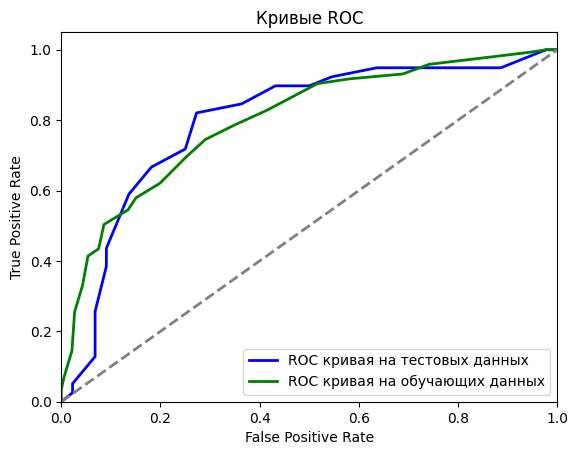

In [98]:

# Построение ROC кривой
plt.figure()
fpr, tpr, thresholds = roc_curve(target_test, test_prob)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC кривая на тестовых данных')

fpr, tpr, thresholds = roc_curve(target_train, train_prob)
plt.plot(fpr, tpr, color='green', lw=2, label='ROC кривая на обучающих данных')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривые ROC')
plt.legend(loc="lower right")
plt.show()

Как видно графики расположены высоко от прямой (True Positiv Rate)=(False Positiv Rate) соответствующнй случайному классификатору, площадь под графиками значительно больше 0.5, значит модель адекватнее случайной модели. Кроме того площади под кривой на тестовых данных и под кривой на обучающих данных близки, что говорит об отсутствии эффекта переобучения.